In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the cleaned dataset
file_path = "../data/cleaned_cognitive_decline.csv"
df_cleaned = pd.read_csv(file_path)

In [3]:
# get the first few rows
df_cleaned.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,StratificationCategory2,Stratification2,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Gender,Female,C06,TCC02,Q31,4,AGE,AGE_OVERALL,GENDER,FEMALE
1,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,Hispanic,C06,TCC02,Q31,4,AGE,5064,RACE,HIS
2,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,"White, non-Hispanic",C06,TCC02,Q31,4,AGE,65PLUS,RACE,WHT
3,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,Native Am/Alaskan Native,C06,TCC02,Q31,4,AGE,65PLUS,RACE,NAA
4,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Race/Ethnicity,"Black, non-Hispanic",C06,TCC02,Q31,4,AGE,AGE_OVERALL,RACE,BLK


In [19]:
df_cleaned.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,StratificationCategory2,Stratification2,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
22177,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,PRCTG,...,Race/Ethnicity,Native Am/Alaskan Native,C06,TCC04,Q42,56,AGE,5064,RACE,NAA
22178,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,PRCTG,...,Race/Ethnicity,Hispanic,C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,HIS
22179,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,PRCTG,...,Race/Ethnicity,Hispanic,C06,TCC04,Q42,56,AGE,5064,RACE,HIS
22180,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,PRCTG,...,Gender,Female,C06,TCC04,Q42,56,AGE,5064,GENDER,FEMALE
22181,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,PRCTG,...,Race/Ethnicity,"White, non-Hispanic",C06,TCC04,Q42,56,AGE,5064,RACE,WHT


In [4]:
# getting the basic info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22182 entries, 0 to 22181
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  22182 non-null  int64  
 1   YearEnd                    22182 non-null  int64  
 2   LocationAbbr               22182 non-null  object 
 3   LocationDesc               22182 non-null  object 
 4   Datasource                 22182 non-null  object 
 5   Class                      22182 non-null  object 
 6   Topic                      22182 non-null  object 
 7   Question                   22182 non-null  object 
 8   Data_Value_Unit            22182 non-null  object 
 9   DataValueTypeID            22182 non-null  object 
 10  Data_Value_Type            22182 non-null  object 
 11  Data_Value                 22182 non-null  float64
 12  Data_Value_Alt             22182 non-null  float64
 13  Low_Confidence_Limit       22182 non-null  flo

## 1. Trend Analysis - How Has Cognitive Decline Changed Over Time?

- Visualize the trend of cognitive decline from 2015 to 2022
- The column `Data_Value` represents the percentage of people reporting cognitive decline.

### 1.1 Aggregate Data by Year

**Concept Explanation**
- Since there are multiple data points per year, calculate the average `Data_Value` per year.
- This helps in smoothing out fluctuations.

In [5]:
# group by year and calculate the average Data_Value
yearly_trend = df_cleaned.groupby("YearStart")["Data_Value"].mean().reset_index()

# display the trend data
print(yearly_trend)

   YearStart  Data_Value
0       2015   32.451497
1       2016   32.221516
2       2017   31.637730
3       2018   31.297475
4       2019   31.898509
5       2020   31.716173
6       2021   32.199400
7       2022   31.666103


### 1.2 Plot the Trend

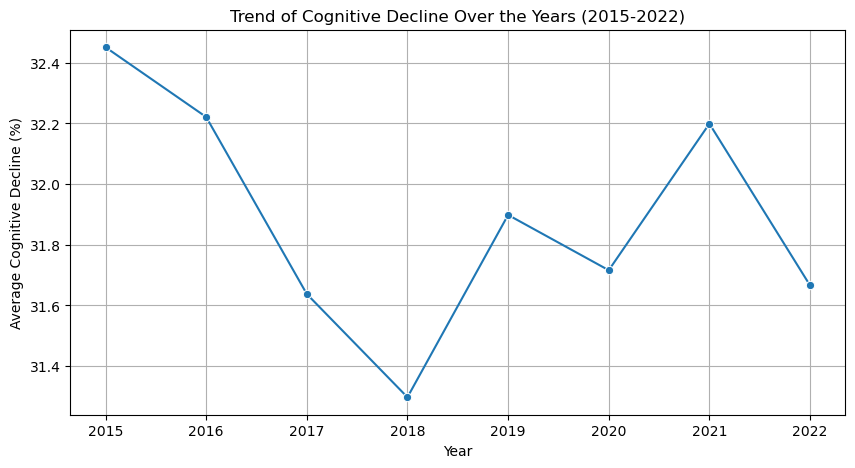

In [6]:
# plot the trend over time
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trend, x="YearStart", y="Data_Value",
             marker="o", linestyle="-")

# add labels and title
plt.xlabel("Year")
plt.ylabel("Average Cognitive Decline (%)")
plt.title("Trend of Cognitive Decline Over the Years (2015-2022)")
plt.grid(True)
plt.show()

**Observations:**
- Cognitive decline rates **decreased** from around **32.4% in 2015** to a low of **31.4% in 2018**.
- After reaching the lowest point in 2018 (~31.4%), cognitive decline reports **increased sharply** in 2019.
- After the increase in 2019, there was a **small drop** in 2020.
- 2021 saw one of the **highest jumps** in cognitive decline reports (~32.2%).
- The percentage **dropped in 2022**, though still higher than 2018 levels.

## 2. Demographic Analysis - Who Is Most Affected?

- Compare cognitive decline across age groups, gender and race

### 2.1 Congnitive Decline by Age Group

**Concept Explanation**
- Group data by Age `Stratification1` and compute the mean `Data_Value` for each group.

In [17]:
# Check unique values in StratificationCategory1
print("Unique values in StratificationCategory1:")
print(df_cleaned["StratificationCategory1"].unique())

Unique values in StratificationCategory1:
['Age Group']


In [7]:
# filter only AGE-related rows
age_group_data = df_cleaned[df_cleaned["StratificationCategory1"] == "Age"]
age_trend = age_group_data.groupby("Stratification1")["Data_Value"].mean().reset_index()

In [9]:
# sort for better visualization
age_trend = age_trend.sort_values(by="Data_Value", ascending=False)

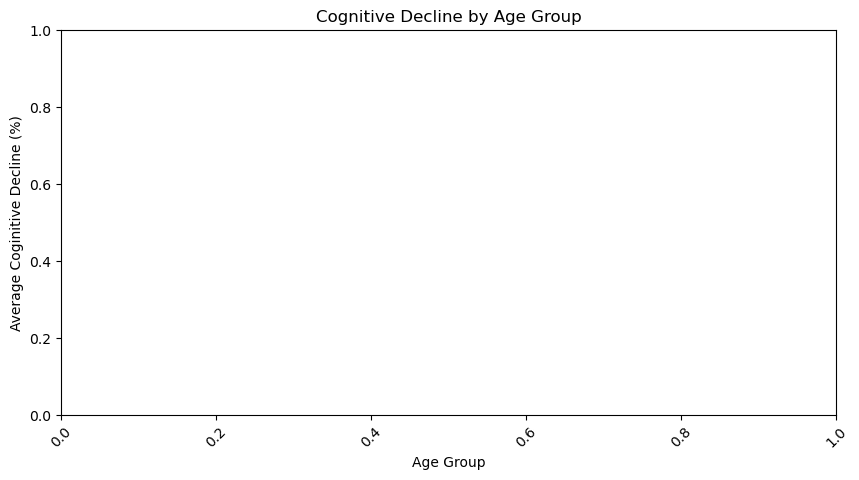

In [10]:
# plot
plt.figure(figsize=(10,5))
sns.barplot(data=age_trend, x="Stratification1", y="Data_Value",
            palette="coolwarm")

plt.xlabel("Age Group")
plt.ylabel("Average Coginitive Decline (%)")
plt.title("Cognitive Decline by Age Group")
plt.xticks(rotation=45)
plt.show()

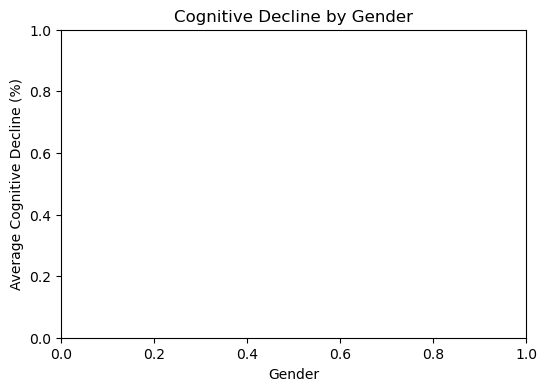

In [12]:
# Filter gender-related data
gender_data = df_cleaned[df_cleaned["StratificationCategory1"] == "Gender"]
gender_trend = gender_data.groupby("Stratification1")["Data_Value"].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=gender_trend, x="Stratification1", y="Data_Value", palette="muted")

# Labels
plt.xlabel("Gender")
plt.ylabel("Average Cognitive Decline (%)")
plt.title("Cognitive Decline by Gender")
plt.show()


/var/folders/vz/t7hhp_d94_x5_9qpjz3_2bf80000gn/T/ipykernel_26208/4083620474.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=race_trend, x="Stratification2", y="Data_Value", palette="viridis")


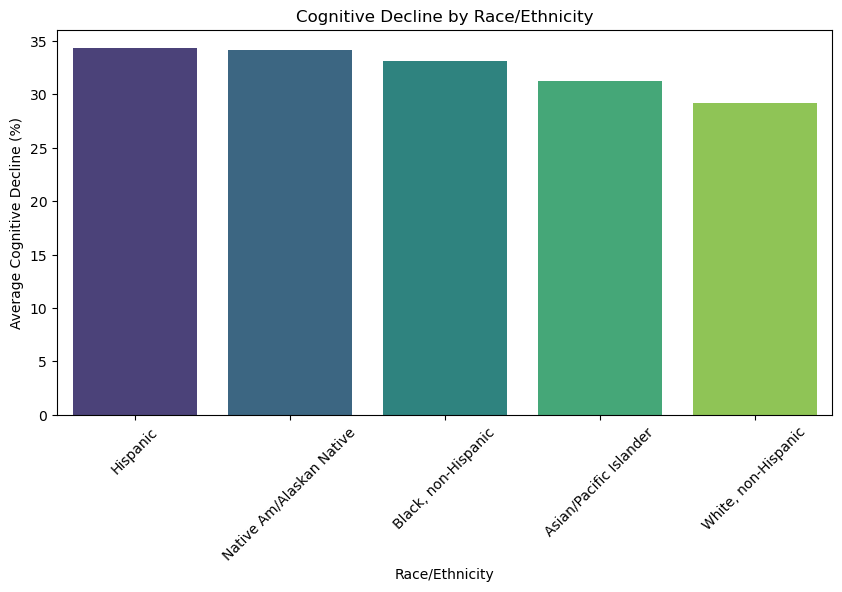

In [13]:
# Filter race-related data
race_data = df_cleaned[df_cleaned["StratificationCategory2"] == "Race/Ethnicity"]
race_trend = race_data.groupby("Stratification2")["Data_Value"].mean().reset_index()

# Sort
race_trend = race_trend.sort_values(by="Data_Value", ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=race_trend, x="Stratification2", y="Data_Value", palette="viridis")

# Labels
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Cognitive Decline (%)")
plt.title("Cognitive Decline by Race/Ethnicity")
plt.xticks(rotation=45)
plt.show()


## 3. Geographic Analysis - State-wise Comparison

- Comparing cognitive decline rates across U.S. states

#### 3.1 Compute Average Cognitive Decline per State

In [14]:
# group data by state
state_trend = df_cleaned.groupby("LocationDesc")["Data_Value"].mean().reset_index()

# Sort for visualization
state_trend = state_trend.sort_values(by="Data_Value", ascending=False)

/var/folders/vz/t7hhp_d94_x5_9qpjz3_2bf80000gn/T/ipykernel_26208/2857104101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_trend, x="Data_Value", y="LocationDesc", palette="mako")


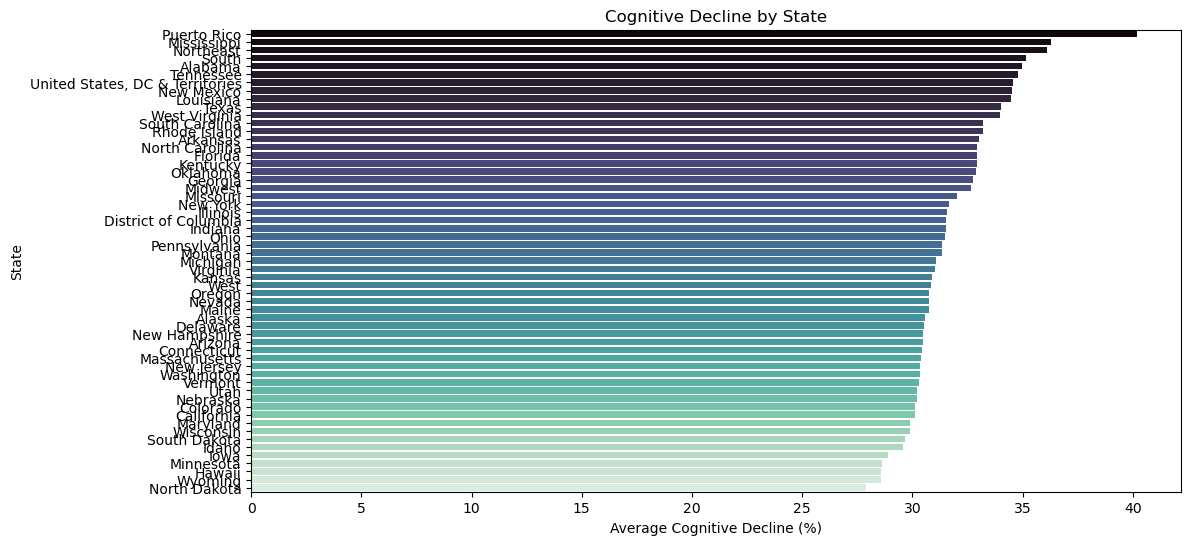

In [15]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=state_trend, x="Data_Value", y="LocationDesc", palette="mako")

# Labels
plt.xlabel("Average Cognitive Decline (%)")
plt.ylabel("State")
plt.title("Cognitive Decline by State")
plt.show()

## 4. Correlation Study - What Influences Cognitive Decline?

- Are these correlations between age, gender, race and cognitive decline?

In [16]:
# Compute correlations
corr_matrix = df_cleaned.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Cognitive Decline Factors")
plt.show()

ValueError: could not convert string to float: 'AZ'